```
텍스트 + 이미지
텍스트 입력--> 이미지 생성
U-NET, CLIP 텍스트 인코더 ,Diffusion프로세스를 처리 및 상당한 학습시간과 데이터가 필요

현실적인 대안 : 전이학습... stable-diffusion 모델을 활용
```


diffusers
```
텍스트 두 이미지 , 이미지 두 테스트, 노이즈제거 등 디퓨전 기반 생성모델을 쉽게 사용 할 수 있도록 하는 라이브러리
다양한 모델델과 파이프라인을 제공
```
invisible_watermark
```
워터마크를 삽입 또는 제거
디퓨전 모델로 생성한 이미지에 저작권 보호를 위해서 워터마크 삽입
```
safetensors
```
pickle 보다 안전하고 빠르다  
diffusers, transformers 모델 로딩할때 사용 할 수 있음
```

In [ ]:
%pip install diffusers --upgrade
%pip install invisible_watermark transformers accelerate safetensors

In [ ]:
%pip install hf_xet

In [3]:
import torch
from diffusers import DiffusionPipeline

In [ ]:
# 모델 가져오기
device = 'cuda' if torch.cuda.is_available() else 'cpu'
pipe = DiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-xl-base-1.0',
    torch_dtype=torch.float16, use_safetensors=True, variant='fp16')
pipe.to(device)

In [5]:
prompt = 'An image representing Korea'
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

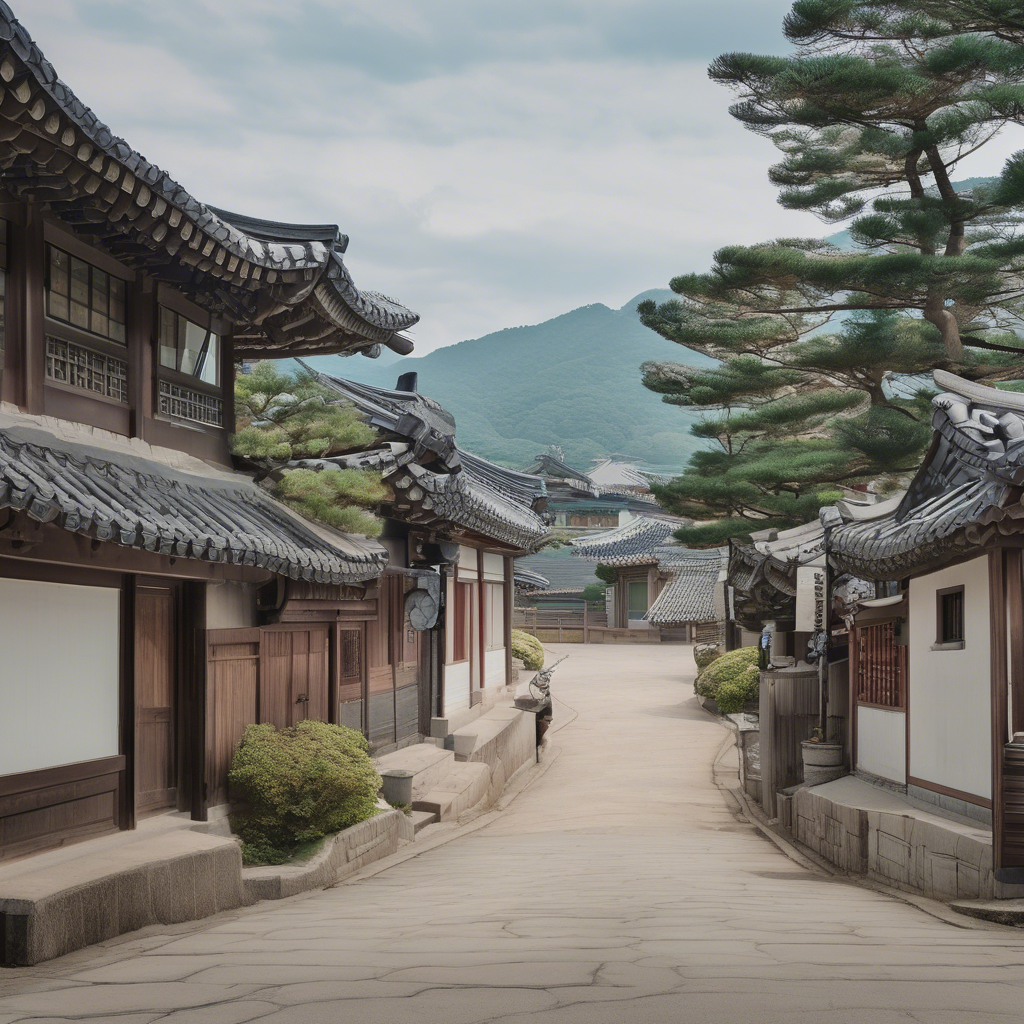

In [6]:
images

In [9]:
prompt = '한국을 대표하는 이미지'
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
images

파인튜닝
```
한글 프롬프트를 더 잘 이해하도록 텍스트 인코더와 U-NET 을 조정하는 과정

영어번역을 활용
프롬프트 엔지니어링 : 한글프롬프트에 영어 스타일 가이드 추가(한옥마을, realistic, vibrant colors)

프롬프트 최적화
  한글프롬프트에 영어스타일 키워드 추가
```

In [ ]:
# 한글프롬프트 -> 영어 번역
k_prompt = '5명이 팀 프로젝트를 진행하는데 대표 이미지하나 만들어줘'
e_prompt = 'Five people are working on a team project, so please create a representative image.'
images = pipe(prompt=e_prompt, num_inference_steps=50,guidance_scale=7.5).images[0]
images

파인튜닝  Stable Diffusion SDXL  
```
 텍스트->이미지
 텍스트 인코더 : CLIP 벡터로 변환
 이미지 디코더 : u-net(노이즈에서 이미지를 점점 복원해 가는 생성형 네트웍)
 데이터 : coco의 한글번역 캡션 은 용량이 크고
 Flickr8k: 활용
 ```

In [ ]:
# 라이브러리
%pip install kagglehub torch pandas